самый простой dataset

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from pathlib import Path
from pydotplus import graph_from_dot_data
from IPython.display import Image
import pandas as pd 
import numpy as np
from sklearn.tree import export_graphviz


In [18]:
data = pd.DataFrame(data={'Age':[12, 87, 44], 'y':[1, 1, 0]}, columns=['Age', 'y'])
y = data['y']


X_train = data[['Age']]
data

,Age,y
0,12,1
1,87,1
2,44,0


In [19]:
learning_rate=0.1
clf = GradientBoostingClassifier(n_estimators=2, learning_rate=learning_rate, max_depth=1, random_state=0).fit(X_train, y)
clf.predict(X_train)


array([1, 1, 1], dtype=int64)

In [20]:
initial_prediction = y.mean()
# 2/3

data['initial_prediction'] = initial_prediction
data['output_0'] = np.log(initial_prediction/(1-initial_prediction))
data['residuals_0'] = data['y'] - initial_prediction

data

# initial prediction - это вероятность начальная, а output мерится в logodds = log(p/(1-p))

,Age,y,initial_prediction,output_0,residuals_0
0,12,1,0.666667,0.693147,0.333333
1,87,1,0.666667,0.693147,0.333333
2,44,0,0.666667,0.693147,-0.666667


первое дерево, которое делает predict residuals_0

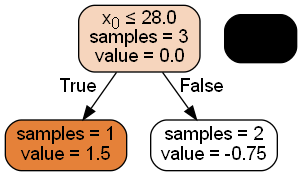

In [21]:
# Get the tree number 1
sub_tree = clf.estimators_[0, 0]

# Visualization

dot_data = export_graphviz(
    sub_tree,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
png = graph.create_png()

Path('./out_1.png').write_bytes(png)
Image(png)

In [22]:
# влево идут
mask = (data['Age']<28)
data[mask]


,Age,y,initial_prediction,output_0,residuals_0
0,12,1,0.666667,0.693147,0.333333


In [23]:
# как посчитать output value для первого узла
mask = (data['Age']<28)
data[mask]
data.loc[mask, 'output_1'] =  data.loc[mask, 'residuals_0']/(data.loc[mask, 'initial_prediction']*(1-data.loc[mask, 'initial_prediction']))
data

,Age,y,initial_prediction,output_0,residuals_0,output_1
0,12,1,0.666667,0.693147,0.333333,1.5
1,87,1,0.666667,0.693147,0.333333,NaN
2,44,0,0.666667,0.693147,-0.666667,NaN


In [24]:
# как посчитать output value для первого узла
p_prev = 2/3
residual = 1-2/3
output = residual/(p_prev*(1-p_prev))
output

1.5

In [25]:
# вправо идут
mask = (data['Age']>28)
data[mask]


,Age,y,initial_prediction,output_0,residuals_0,output_1
1,87,1,0.666667,0.693147,0.333333,NaN
2,44,0,0.666667,0.693147,-0.666667,NaN


In [26]:
#  а как посчитать output value для второго узла
p_prev_1 = 2/3
p_prev_2 = 2/3


residual_1 = 1-p_prev_1
residual_2 = 0-p_prev_2
output = (residual_1+residual_2)/(p_prev_1*(1-p_prev_1)+p_prev_2*(1-p_prev_2))
output

-0.7499999999999998

In [27]:
# как посчитать output value для второго узла 
mask = (data['Age']>28)
data[mask]
data.loc[mask, 'output_1'] =  data.loc[mask, 'residuals_0'].sum()/(data.loc[mask, 'initial_prediction']*(1-data.loc[mask, 'initial_prediction']).sum())
data

,Age,y,initial_prediction,output_0,residuals_0,output_1
0,12,1,0.666667,0.693147,0.333333,1.50
1,87,1,0.666667,0.693147,0.333333,-0.75
2,44,0,0.666667,0.693147,-0.666667,-0.75


теперь расчитаем на вероятность

In [28]:
output_1_total = data['output_0'] + learning_rate*data['output_1']
data['prediction_1'] = 1/(1+np.exp(-output_1_total))
data

,Age,y,initial_prediction,output_0,residuals_0,output_1,prediction_1
0,12,1,0.666667,0.693147,0.333333,1.50,0.699128
1,87,1,0.666667,0.693147,0.333333,-0.75,0.649797
2,44,0,0.666667,0.693147,-0.666667,-0.75,0.649797


In [29]:
#  сравниваем с реализацией бустинга. ура!!! совпала
for ypred in clf.staged_predict_proba(X_train):
    print(ypred)

[[0.30087237 0.69912763]
 [0.35020296 0.64979704]
 [0.35020296 0.64979704]]
[[0.31789392 0.68210608]
 [0.31603768 0.68396232]
 [0.36854416 0.63145584]]


второе дерево смотрим

рассчитаем residuals, которые будем минимизировать вторым деревом

In [30]:
data['residuals_1'] = data['y'] - data['prediction_1']

data

,Age,y,initial_prediction,output_0,residuals_0,output_1,prediction_1,residuals_1
0,12,1,0.666667,0.693147,0.333333,1.50,0.699128,0.300872
1,87,1,0.666667,0.693147,0.333333,-0.75,0.649797,0.350203
2,44,0,0.666667,0.693147,-0.666667,-0.75,0.649797,-0.649797


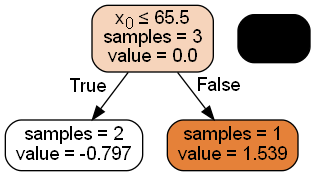

In [31]:
# Get the tree number 2
sub_tree = clf.estimators_[1, 0]

# Visualization

dot_data = export_graphviz(
    sub_tree,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
png = graph.create_png()

Path('./out_2.png').write_bytes(png)
Image(png)

In [32]:
# влево идут
mask = (data['Age']<65.5)
data[mask]


,Age,y,initial_prediction,output_0,residuals_0,output_1,prediction_1,residuals_1
0,12,1,0.666667,0.693147,0.333333,1.50,0.699128,0.300872
2,44,0,0.666667,0.693147,-0.666667,-0.75,0.649797,-0.649797


In [33]:
# как посчитать output value для второго узла
mask = (data['Age']<65.5)
data[mask]
data.loc[mask, 'output_2'] =  data.loc[mask, 'residuals_1'].sum()/((data.loc[mask, 'prediction_1']*(1-data.loc[mask, 'prediction_1'])).sum())
data

,Age,y,initial_prediction,output_0,residuals_0,output_1,prediction_1,residuals_1,output_2
0,12,1,0.666667,0.693147,0.333333,1.50,0.699128,0.300872,-0.796797
1,87,1,0.666667,0.693147,0.333333,-0.75,0.649797,0.350203,NaN
2,44,0,0.666667,0.693147,-0.666667,-0.75,0.649797,-0.649797,-0.796797


In [34]:
# как посчитать output value для второго узла 
mask = (data['Age']>65.5)
data[mask]
data.loc[mask, 'output_2'] =  data.loc[mask, 'residuals_1'].sum()/((data.loc[mask, 'prediction_1']*(1-data.loc[mask, 'prediction_1'])).sum())
data

,Age,y,initial_prediction,output_0,residuals_0,output_1,prediction_1,residuals_1,output_2
0,12,1,0.666667,0.693147,0.333333,1.50,0.699128,0.300872,-0.796797
1,87,1,0.666667,0.693147,0.333333,-0.75,0.649797,0.350203,1.538942
2,44,0,0.666667,0.693147,-0.666667,-0.75,0.649797,-0.649797,-0.796797


теперь расчитаем на вероятность

In [35]:
output_total = data['output_0'] + learning_rate*data['output_1'] + learning_rate*data['output_2']
data['prediction_2'] = 1/(1+np.exp(-output_total))
data

,Age,y,initial_prediction,output_0,residuals_0,output_1,prediction_1,residuals_1,output_2,prediction_2
0,12,1,0.666667,0.693147,0.333333,1.50,0.699128,0.300872,-0.796797,0.682106
1,87,1,0.666667,0.693147,0.333333,-0.75,0.649797,0.350203,1.538942,0.683962
2,44,0,0.666667,0.693147,-0.666667,-0.75,0.649797,-0.649797,-0.796797,0.631456


In [36]:
#  сравниваем с реализацией бустинга. ура!!! совпала
for ypred in clf.staged_predict_proba(X_train):
    print(ypred)

[[0.30087237 0.69912763]
 [0.35020296 0.64979704]
 [0.35020296 0.64979704]]
[[0.31789392 0.68210608]
 [0.31603768 0.68396232]
 [0.36854416 0.63145584]]


In [37]:
#  получили аналогичный результат как и prediction_2
clf.predict_proba(X_train)

array([[0.31789392, 0.68210608],
       [0.31603768, 0.68396232],
       [0.36854416, 0.63145584]])

initial = 'zero' значает что у всех будет вероятность 0.5 вне зависимости от долей начальных
то же совпадаем

In [40]:
clf = GradientBoostingClassifier(n_estimators=1, learning_rate=1.0, max_depth=1, random_state=0, init='zero').fit(X_train, y)
clf.predict(X_train)


array([1, 0, 0], dtype=int64)